# Decision Tree Classifiers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

%matplotlib inline

# pip install graphviz
# download graphviz
# add directory path to dot.exe to system path

## Purity Measures
We need to find a quantity that is minimised when the two classes are equally separated

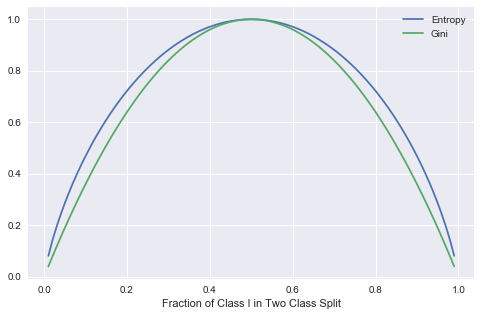

In [2]:
r=np.linspace(0.01,0.99,100)
e=-r*np.log2(r)-(1-r)*np.log2(1-r)
g=2.0*((1-r*r)-(1-r)**2)

plt.figure(figsize=(8,5))
plt.plot(r,e,label="Entropy")
plt.plot(r,g,label="Gini")
plt.xlabel('Fraction of Class I in Two Class Split')
plt.legend();

## Visualisation

In [3]:
m=250

In [4]:
np.random.seed(10)

In [5]:
X = np.random.rand(m,2)

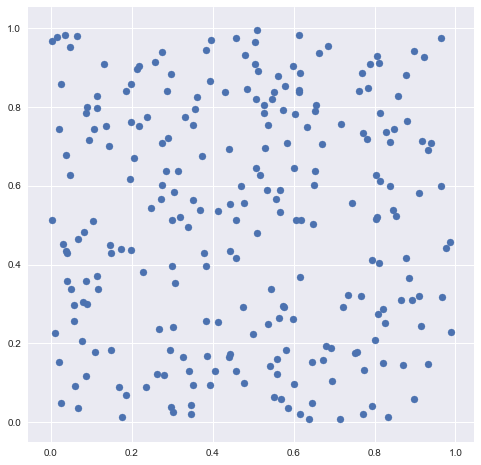

In [6]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0],X[:,1])

In [7]:
y = []

for i in range(0,int(m)):
    
    xx = X[i,0]
    yy = X[i,1]
    c = 0
    
    if xx < 0.5 and yy < 0.3:
        c = 1
    
    if xx > 0.5 and yy > 0.5 and yy < 0.8:
        c = 1

    if xx > 0.5 and xx < 0.7 and yy > 0.8:
        c = 1
        
    y.append(c)

Text(0, 0.5, 'Y')

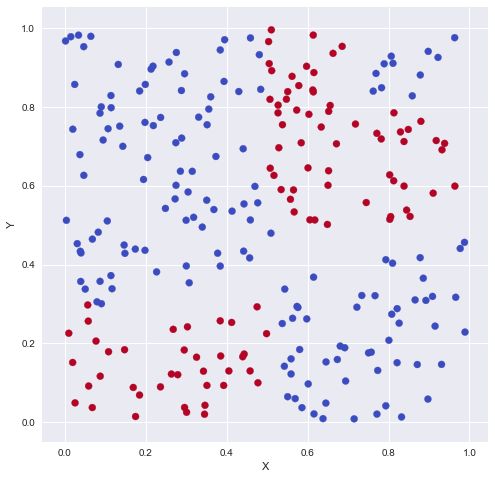

In [8]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.coolwarm)
plt.xlabel("X")
plt.ylabel("Y")

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from os import system
from graphviz import Source

In [10]:
clf = DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X, y)

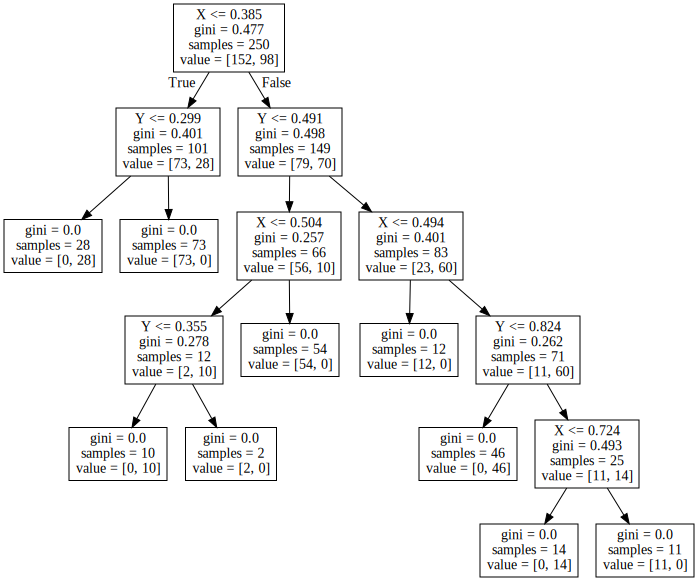

In [11]:
from IPython.display import SVG
graph = Source(export_graphviz(clf, out_file=None, feature_names=['X','Y']))
SVG(graph.pipe(format='svg'))

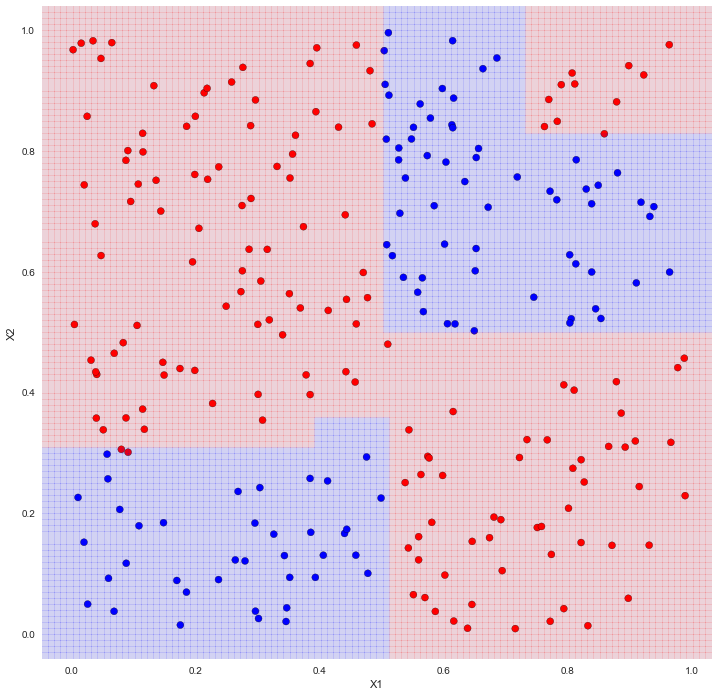

In [12]:
import HelpfulFunctions as hp
df = pd.DataFrame(X)
df.columns = ['X1','X2']
plt.figure(figsize=(12,12))
hp.featureSpacePlot('X1','X2',df,y,clf,plt)

## Using a Decision Tree Classifier on Iris Dataset

In [13]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [14]:
from sklearn.datasets import load_iris
import pandas as pd
    
iris = load_iris()
X = pd.DataFrame(iris.data)
y = iris.target
X.columns = ['sepalLength','sepalWidth','petalLength','petalWidth']
X.head()

,sepalLength,sepalWidth,petalLength,petalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
X.shape

(150, 4)

### Using Two Features to Predict Virginica

In [16]:
X_2 = X[['sepalLength','sepalWidth']]

In [17]:
# I only want a binary classification to start with
y_2 = (np.array(y)==2).astype(np.int)

In [18]:
clf = DecisionTreeClassifier(random_state=235)
clf = clf.fit(X_2, y_2)

In [19]:
y_pred  = clf.predict(X_2)

In [20]:
cm = confusion_matrix(y_2, y_pred)

In [21]:
print(cm)

[[99  1]
 [10 40]]


In [22]:
print(classification_report(y_2,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       100
           1       0.98      0.80      0.88        50

   micro avg       0.93      0.93      0.93       150
   macro avg       0.94      0.90      0.91       150
weighted avg       0.93      0.93      0.92       150



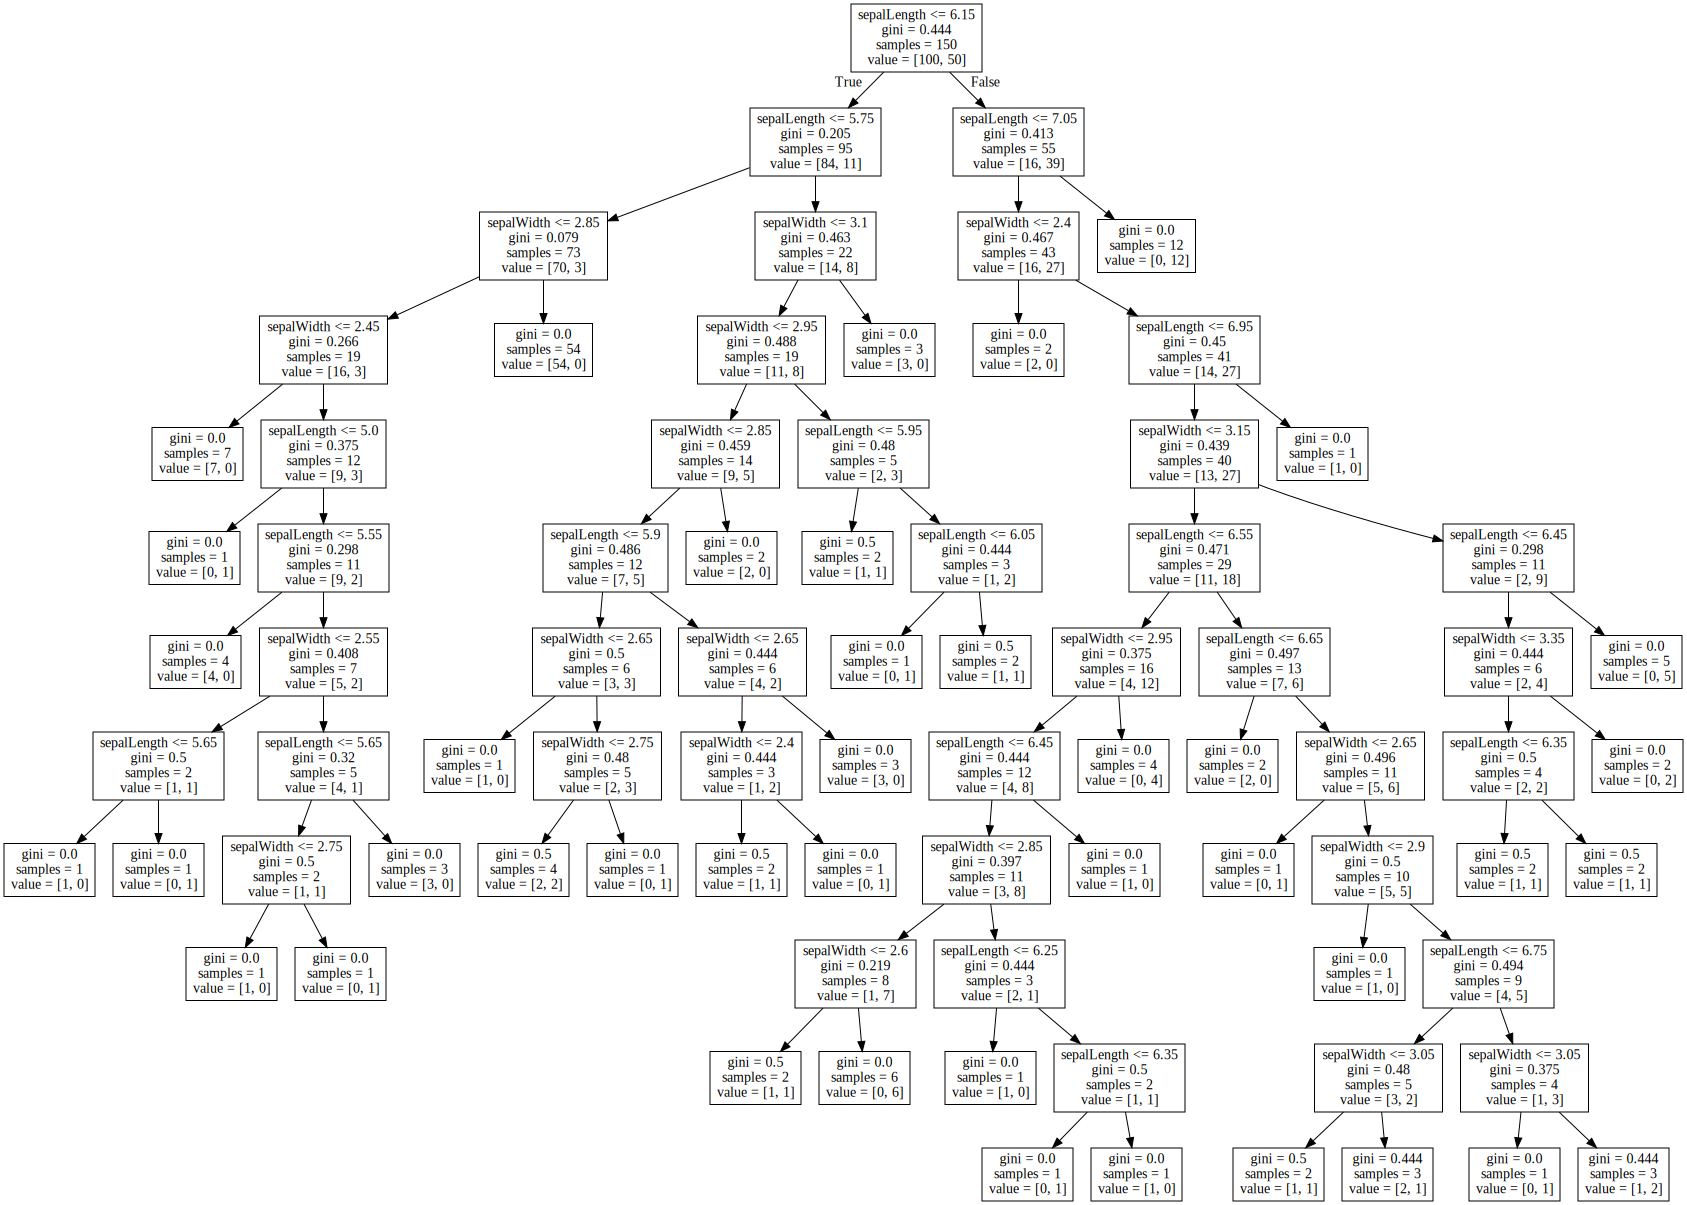

In [23]:
from IPython.display import SVG
graph = Source(export_graphviz(clf, out_file=None, feature_names = X_2.columns))
SVG(graph.pipe(format='svg'))

In [24]:
# Ambiguity in data set
X_2['y'] = y_2
X_2.sort_values(['sepalWidth','sepalLength'])

C:\Users\Dominic\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,sepalLength,sepalWidth,y
60,5.0,2.0,0
62,6.0,2.2,0
119,6.0,2.2,1
68,6.2,2.2,0
41,4.5,2.3,0
93,5.0,2.3,0
53,5.5,2.3,0
87,6.3,2.3,0
57,4.9,2.4,0
80,5.5,2.4,0


### Using Four Features to Predict Virginica

In [25]:
clf = DecisionTreeClassifier(max_depth=5, random_state=234)
clf = clf.fit(X, y_2)

In [26]:
y_pred  = clf.predict(X)

In [27]:
cm = confusion_matrix(y_2, y_pred)

In [28]:
print(cm)

[[100   0]
 [  0  50]]


The Decision Tree has the ability to do a perfect fit.

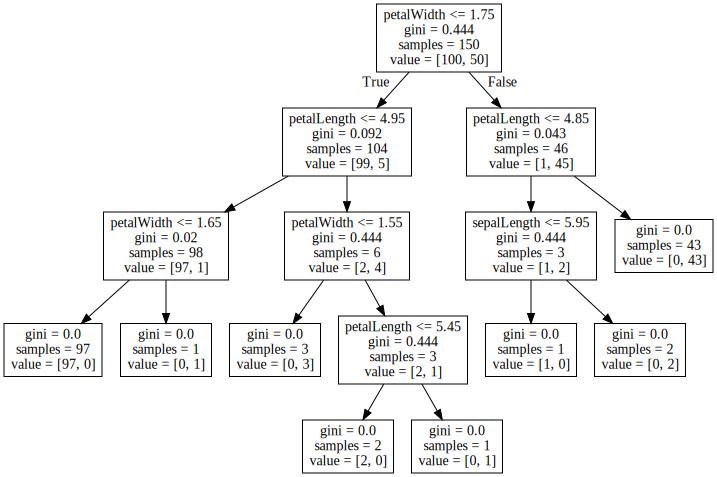

In [29]:
from IPython.display import SVG
graph = Source(export_graphviz(clf, out_file=None, feature_names = X.columns))
SVG(graph.pipe(format='svg'))

## Multiclass Classification Decision Boundary

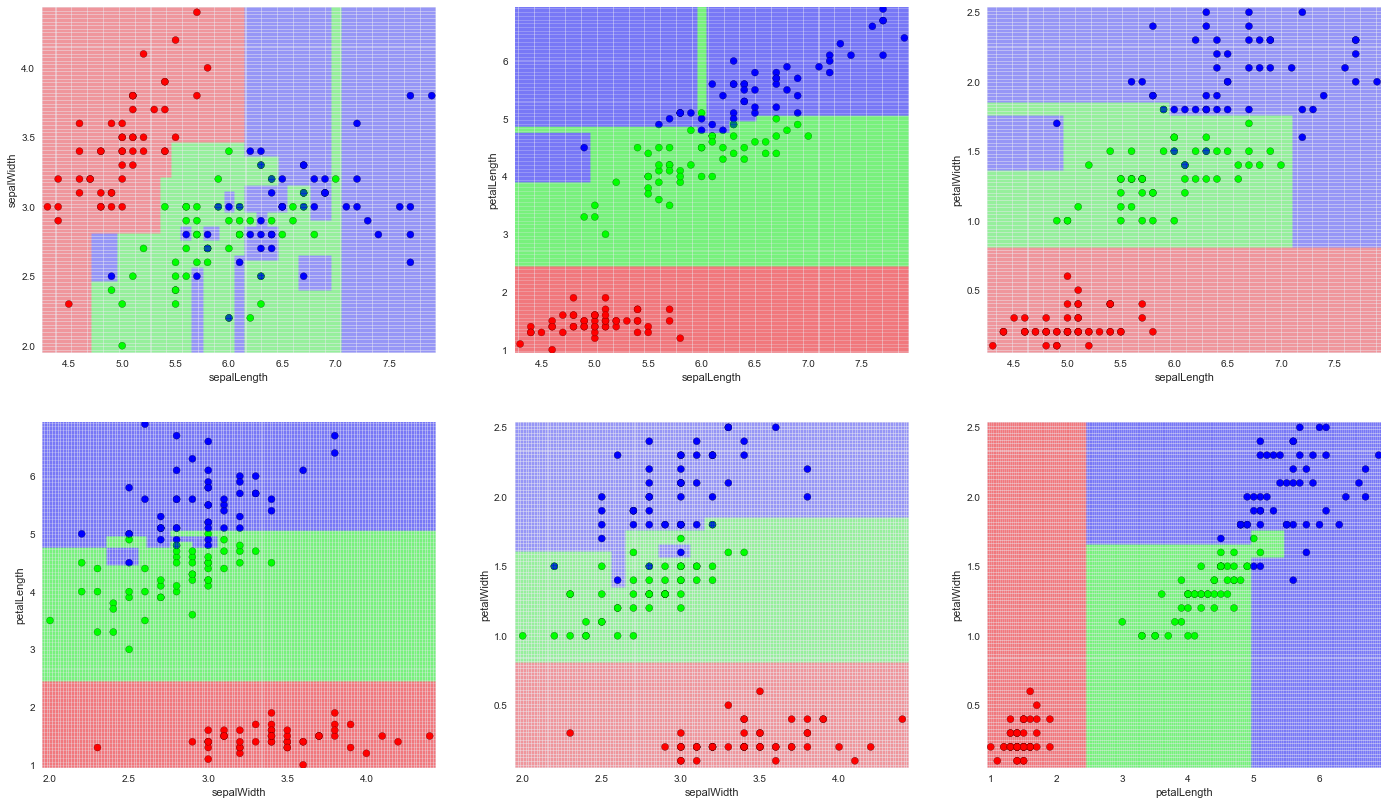

In [30]:
# Let us examine all of the Feature Space Decision Boundaries

import HelpfulFunctions as hp

plt.figure(figsize=(24,14))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],[1, 2], [1, 3], [2, 3]]):
    
    featureX = X.columns[pair[0]]
    featureY = X.columns[pair[1]]
    
    X_2 = X[[featureX, featureY]]

    clf = DecisionTreeClassifier()
    clf.fit(X_2, y)
    
    plt.subplot(2, 3, pairidx + 1)
    
    hp.featureSpacePlot(featureX,featureY,X,y,clf,plt)


## Prediction Quality with Two Features

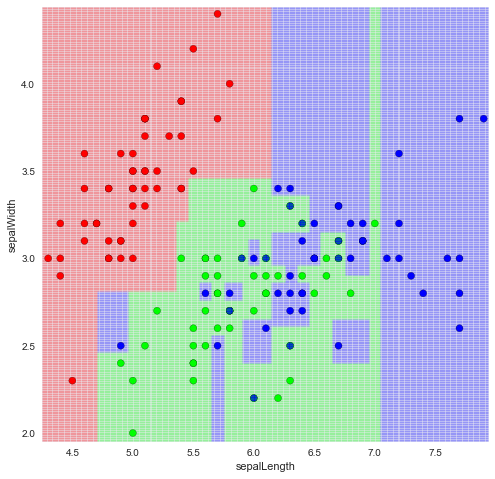

In [31]:
featureX = 'sepalLength'
featureY = 'sepalWidth'

X_2 = X[[featureX,featureY]]
y = iris['target']

clf = DecisionTreeClassifier()
clf.fit(X_2, y)
plt.figure(figsize=(8, 8))

hp.featureSpacePlot(featureX,featureY,X,y,clf,plt)

In [32]:
y_pred = clf.predict(X_2)

[[50  0  0]
 [ 0 49  1]
 [ 0 10 40]]


<Figure size 720x720 with 0 Axes>

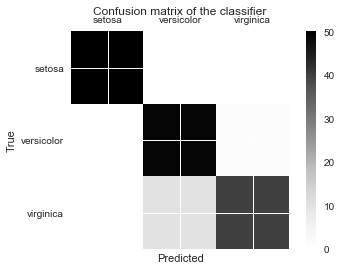

In [33]:
cm = confusion_matrix(y, y_pred)
hp.print_cm(cm,['setosa', 'versicolor', 'virginica'],plt);

## Prediction Quality with Four Features


[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


<Figure size 720x720 with 0 Axes>

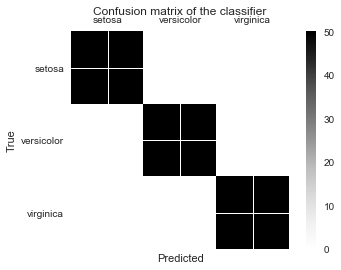

In [34]:
clf = DecisionTreeClassifier()
clf.fit(X, y)

y_pred = clf.predict(X)
cm = confusion_matrix(y, y_pred)
hp.print_cm(cm,['setosa', 'versicolor', 'virginica'],plt);